# The Vicsek Model 


#TODO (Marc and Jake)
calculate_order_stat method 
plot_order_stat method
calculate_new_theta method


In [22]:
import numpy as np 
import random 
from numpy import linalg as lag
from math import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from IPython.display import HTML


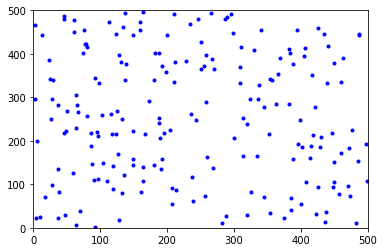

In [37]:

##USEFUL FUNCTIONS
normal = lambda p: np.array([cos(p),sin(p)])
normalise = lambda p: p/(sqrt(p[0]**2+p[1]**2))
def angle(p):
    principle_angle = np.arctan(p[1]/p[0])
    if p[0]>=0:
        return principle_angle
    else:
        return principle_angle + pi

class Bird():
    def __init__(self,speed,frame_size):
        self.speed = speed
        self.pos = np.array([random.uniform(0,frame_size),random.uniform(0,frame_size)])
        self.theta = random.uniform(0,2*pi)
        self.frame_size = frame_size

    def calculate_new_posdir(self,flock,dt,sigma,R):
        new_theta = self.calculate_new_theta(flock.postions,R)
        n = normal(new_theta)
        new_pos = np.mod((self.pos + self.speed*n*dt),self.frame_size)
        return np.array([new_pos,new_theta])
    
    def get_thetas_in_rad(self,flock,R):
        pd = flock.get_posdir()
        rad_thetas = pd[np.sqrt(np.sum((pd[:,0:2]- np.tile(b.pos,(len(pd[:,0]),1)))**2,axis=1))<R][:,2] 
        return rad_thetas

    
    def calculate_new_theta(self,flock_posdir,sigma,R):
        #TODO : find birds within radius, do the two-dimensional vector sumof the ˆnj , 
        # normalize the result, and then take the angle of it
        
        thetas_in_rad = self.get_thetas_in_rad(flock,R)
        n_sum  = np.sum(normal(thetas_in_rad))
        nsum_theta = angle(normalise(n_sum))
        new_theta = nsum_theta + random.gauss(0,sigma)

        #for b in birds_in_radius:
            

class Flock():
    def __init__(self,N,speed,frame_size):
        self.birds =[Bird(speed,frame_size) for b in range(N)]
        self.frame_size =frame_size

    def get_positions(self):
        return np.array([bird.pos for bird in self.birds])

    def get_thetas(self):
        return np.array([bird.theta for bird in self.birds])
    
    def get_posdir(self):
        p = f.get_positions()
        d = f.get_thetas()
        pd= np.array([p[:,0],p[:,1],d]).transpose()
        return pd


    def update_posdirs(self,dt,sigma,R):
        new_posdir = [b.calculate_new_posdir(self,dt,sigma,R) for b in self.birds]
        for i,b in enumerate(self.birds):
            b.pos = new_posdir[i][0]
            b.theta =new_posdir[i][1]

    def display_state(self):
        """Displays current postions of birds on scatter plot """
        fig,ax = plt.subplots()
        positions =self.get_positions()
        ax.set(xlim=(0,self.frame_size),ylim = (0,self.frame_size))
        plt.scatter(positions[:,0],positions[:,1],marker =".",color ="b")
        plt.show()

    def animate_movement(self,dt,interval,frames):
        """Creates a matplotlib animation of the birds moving """
        ##setting up plot
        fig,ax = plt.subplots()
        ax.set(xlim=(0,self.frame_size),ylim=(0,self.frame_size))
        init_pos = self.get_positions()
        scat =ax.scatter(init_pos[0],init_pos[1],marker=".",c="b")

        #used in funcanimation to update states
        def animate(i):
            self.update_pos(dt)
            pos = self.get_positions()
            scat.set_offsets(pos)
        anim  = animation.FuncAnimation(
            fig,animate,interval = interval,frames =frames
        )
        return anim
    def get_movement_arrays(self,dt,interval,fames):
        #TODO 
        pass
    

    def calculate_order_stat(self):
        pass
    
    def plot_order_stat(self):
        pass

b= Bird(10,500)
        

f = Flock(200,10,500)


f.display_state()

In [38]:
##angle testing
def test_angle(arr):
    for theta in arr:
        print("theta = {}, angle(normal(theta)) ={}".format(theta,angle(normal(theta))))
test_angle(range(7))

theta = 0, angle(normal(theta)) =0.0
theta = 1, angle(normal(theta)) =1.0
theta = 2, angle(normal(theta)) =-1.1415926535897931
theta = 3, angle(normal(theta)) =-0.14159265358979323
theta = 4, angle(normal(theta)) =4.0
theta = 5, angle(normal(theta)) =1.8584073464102067
theta = 6, angle(normal(theta)) =2.858407346410207


## Straight Line Birds
To test out animation and position updating slowly we will use a simple straight line bird that moves at a constant speed in a random direction.

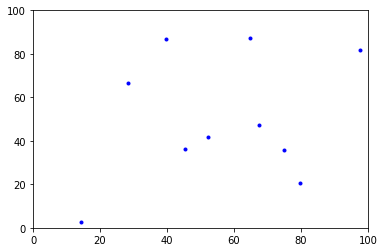

In [14]:
class SL_Bird(Bird):
    def calculate_new_pos(self,dt):
        n = normal(self.theta)
        new_pos = np.mod((self.pos + self.speed*n*dt),self.frame_size)
        return np.array(new_pos)

class SL_Flock(Flock):
    def __init__(self,N,speed,frame_size):
        Flock.__init__(self,N,speed,frame_size)
        self.birds = [SL_Bird(speed,frame_size) for b in range(N)]
    def update_pos(self,dt):
        new_pos = [b.calculate_new_pos(dt) for b in self.birds]
        for i,b in enumerate(self.birds):
            b.pos = new_pos[i]


%matplotlib inline
fsl = SL_Flock(10,100,100)
fsl.display_state()
#test change


In [ ]:
fsl = SL_Flock(50,10,100)
anim = fsl.animate_movement(0.1,10,500)
HTML(anim.to_jshtml())

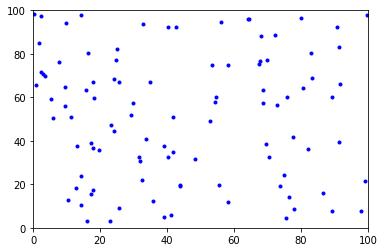

In [20]:
##animating movement
#flock set up - this flock has 10 birds with a speed of 10
frame_size=100
dt =0.1
fsl = SL_Flock(100,10,frame_size)
anim = fsl.animate_movement(0.1,1,500)
HTML(anim.to_jshtml())


## Birds Of Prey
We will add Birds of Prey(BOP) and Prey classes that inherit from Bird, and a BOP_Flock where the number of birds of prey and prey can be specified.

In [ ]:
class BOP(Bird):
    def calculate_posdir():
        pass
class Prey(Bird):
    pass